In [2]:
#!/usr/bin/python
# -*- coding: UTF-8 -*- 

In [25]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from time import time
from io import StringIO
import re
from IPython.core.display import display, HTML
import json

In [26]:
import requests
from pyquery import PyQuery as pq

In [27]:
def slice_page_text(web_parser, page_num):
    id_name_prefix = "pf"
    id_name = "#" + id_name_prefix + str(page_num)
#     if(not html_parser(id_name).html()):
#         print("do not exist")
#     HTML(html_parser(id_name).html())
#     print(html_parser(id_name).html())
    return html_parser(id_name).text()

In [28]:
def slice_page(web_parser, page_num):
    id_name_prefix = "pf"
    id_name = "#" + id_name_prefix + str(page_num)
#     if(not html_parser(id_name).html()):
#         print("do not exist")
#     HTML(html_parser(id_name).html())
#     print(html_parser(id_name).html())
    html_parser(id_name).html()
#     for div_row in html_parser(id_name).find("div").html():
#         print(html_parser(div_row).text())
#     print(html_parser(id_name).find("div").find("div").html())
    return html_parser(id_name).html()

In [40]:
ip = "http://140.118.127.132:5000"

In [41]:
def get_page_api(corpid):
    get_page_api_href = ip + "/get_page?corpid=%s" % (corpid)
    return get_page_api_href

In [42]:
def get_div_api(corpid, page_num):
    get_div_api_href = ip + "/get_page?corpid=%s&page=%s" % (corpid, page_num)
    return get_div_api_href

In [43]:
# r = requests.get(get_page_api(corpid))
# r.text

In [44]:
# get_page_api = ip + "/get_div?corpid="
# r = requests.get(get_div_api(corpid, 1))
# r.text

# filter useless

In [45]:
corpid = 6015
html = open("03027502_宏遠證券_2015CSR報.html", 'r', encoding='utf-8')
html_lines = []
for index, line in enumerate(html.readlines()):
#     if(index > 1000000):
#         break
#     filter_flag = False
#     for f in filter_list:
#         if line.startswith(f):
#             filter_flag = True
#             break
#     if filter_flag:
#         continue
#     if(line[:4] == "<div"):
#         print(line[:3])
#         if(not "<img" in line):
#         print(index)
#         match = re.search(r'<img(.*)>', line)
#         if(match):
#             print(match)
#         remove img bcz it is too bigger to load
#         line = re.sub(r'<img.*?>', '', line)
#         html_lines.append(line)

#         match = re.finditer(r'<img(.*)>', line)
#         if match:
#             for img_str in match:
#                 print(img_str)
#         non_img_line = 
        html_lines.append(line)
#         print(line[:3])

#     print(line[:3])
#     html_lines.append(line)

In [46]:
html_text = "".join(html_lines)

In [47]:
html_parser = pq(html_text)

In [48]:
for page_num in range(1, 300):
    page_html = slice_page(html_parser, hex(page_num)[2:])
    if(not page_html):
        print("page = %d => do not exist" % page_num)
        break
    else:
#         display(HTML(page_html))
        data = {'corpid': corpid, 'page': page_num, "div": str(page_html)}
        r = requests.post(ip + "/put_div", json=data)
        print("post ", page_num)
#         print(r.text)
#         print(page_html)

post  1
post  2
post  3
post  4
post  5
post  6
post  7
post  8
post  9
post  10
post  11
post  12
post  13
post  14
post  15
post  16
post  17
post  18
post  19
post  20
post  21
post  22
post  23
post  24
post  25
post  26
post  27
post  28
post  29
post  30
post  31
post  32
post  33
post  34
post  35
post  36
post  37
post  38
post  39
post  40
post  41
post  42
post  43
post  44
post  45
post  46
post  47
post  48
post  49
post  50
post  51
post  52
post  53
post  54
page = 55 => do not exist


In [49]:
css_header = html_parser("style").eq(2).html()
data = {'corpid': corpid, "header": css_header}
r = requests.post(ip + "/put_header", json=data)

In [50]:
data = {'corpid': corpid, 'page': 11, "div": "Test1234"}

r = requests.post(ip + "/put_div", data=json.dumps(data))
r.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request.  Either the server is overloaded or there is an error in the application.</p>\n'

In [51]:
data = {'corpid': 1, 'page': 1, "div": "Test14"}

r = requests.post(ip + "/put_div", json=data)
r.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request.  Either the server is overloaded or there is an error in the application.</p>\n'

In [52]:
json.dumps(data)

'{"corpid": 1, "page": 1, "div": "Test14"}'

'<div class="pc pc1 w0 h0"><div class="t m0 x1 h2 y1 ff1 fs0 fc0 sc0 ls0 ws0"> </div><div class="t m0 x1 h2 y2 ff1 fs0 fc0 sc0 ls0 ws0"> </div><div class="t m0 x1 h2 y3 ff1 fs0 fc0 sc0 ls0 ws0"> </div><div class="t m0 x2 h2 y4 ff1 fs0 fc0 sc0 ls0 ws0"> </div><div class="t m1 x3 h3 y5 ff2 fs1 fc0 sc0 ls0 ws0">宏遠證券股份有限公司</div><div class="t m1 x3 h3 y6 ff2 fs1 fc0 sc0 ls0 ws0">宏遠證券股份有限公司<span class="_ _0"/>宏遠證券股份有限公司</div><div class="t m1 x3 h3 y5 ff2 fs1 fc0 sc0 ls0 ws0">宏遠證券股份有限公司 </div><div class="t m1 x4 h3 y6 ff2 fs1 fc0 sc0 ls0 ws0"> <span class="_ _1"/> </div><div class="t m1 x4 h3 y5 ff2 fs1 fc0 sc0 ls0 ws0"> </div><div class="t m2 x5 h4 y7 ff3 fs2 fc0 sc0 ls0 ws0">一</div><div class="t m2 x5 h4 y8 ff3 fs2 fc0 sc0 ls0 ws0">一<span class="_ _2"/>一</div><div class="t m2 x5 h4 y7 ff3 fs2 fc0 sc0 ls0 ws0">一○</div><div class="t m2 x6 h4 y8 ff3 fs2 fc0 sc0 ls0 ws0">○<span class="_ _2"/>○</div><div class="t m2 x6 h4 y7 ff3 fs2 fc0 sc0 ls0 ws0">○五</div><div class="t m2 x7 h4 y8 ff3 fs2 fc0 
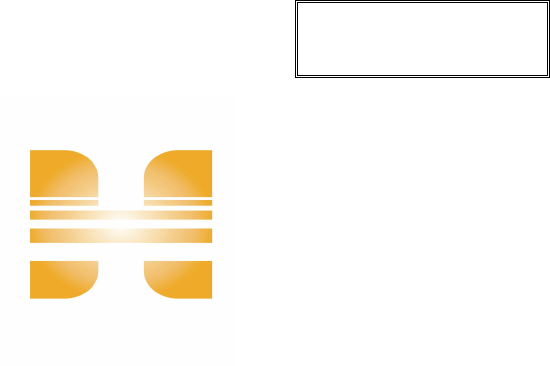

In [58]:
r = requests.get(ip + "/get_div?corpid=6015&page=1")
r.text